# SOAL UAS

NIM :TRI FEBRIYANTO
    
Nama : 2020230053   

### Soal :

- Download dataset iris.csv di salah satu public dataset : keggle, UCI, dsbnya
- Gunakan Dataset : iris.cvs, pilih satu algoritma yang terbaik berdasarkan evaluasi, simpan menggunakan pickle, siapkan app py, deploy dengan streamlit dan upload ke server stremlit

In [174]:
import pandas as pd
from sklearn import datasets

iris=pd.read_csv("iris.csv")
iris.iloc[:,:]

,5.1,3.5,1.4,0.2,Iris-setosa
0,4.9,3.0,1.4,0.2,Iris-setosa
1,4.7,3.2,1.3,0.2,Iris-setosa
2,4.6,3.1,1.5,0.2,Iris-setosa
3,5.0,3.6,1.4,0.2,Iris-setosa
4,5.4,3.9,1.7,0.4,Iris-setosa
...,...,...,...,...,...
144,6.7,3.0,5.2,2.3,Iris-virginica
145,6.3,2.5,5.0,1.9,Iris-virginica
146,6.5,3.0,5.2,2.0,Iris-virginica
147,6.2,3.4,5.4,2.3,Iris-virginica


In [175]:
X=iris.iloc[:,0:4]
y=iris.iloc[:,-1]
print(X)
print(y)

     5.1  3.5  1.4  0.2
0    4.9  3.0  1.4  0.2
1    4.7  3.2  1.3  0.2
2    4.6  3.1  1.5  0.2
3    5.0  3.6  1.4  0.2
4    5.4  3.9  1.7  0.4
..   ...  ...  ...  ...
144  6.7  3.0  5.2  2.3
145  6.3  2.5  5.0  1.9
146  6.5  3.0  5.2  2.0
147  6.2  3.4  5.4  2.3
148  5.9  3.0  5.1  1.8

[149 rows x 4 columns]
0         Iris-setosa
1         Iris-setosa
2         Iris-setosa
3         Iris-setosa
4         Iris-setosa
            ...      
144    Iris-virginica
145    Iris-virginica
146    Iris-virginica
147    Iris-virginica
148    Iris-virginica
Name: Iris-setosa, Length: 149, dtype: object


## Normalize Data - Scalling

In [176]:
from sklearn import preprocessing
X = preprocessing.StandardScaler().fit(X).transform(X.astype(float))

In [177]:
print("10 data pertama: ")
print(X[:10])

10 data pertama: 
[[-1.1483555  -0.11805969 -1.35396443 -1.32506301]
 [-1.3905423   0.34485856 -1.41098555 -1.32506301]
 [-1.51163569  0.11339944 -1.29694332 -1.32506301]
 [-1.02726211  1.27069504 -1.35396443 -1.32506301]
 [-0.54288852  1.9650724  -1.18290109 -1.0614657 ]
 [-1.51163569  0.8077768  -1.35396443 -1.19326436]
 [-1.02726211  0.8077768  -1.29694332 -1.32506301]
 [-1.75382249 -0.34951881 -1.35396443 -1.32506301]
 [-1.1483555   0.11339944 -1.29694332 -1.45686167]
 [-0.54288852  1.50215416 -1.29694332 -1.32506301]]


In [178]:
print("10 label pertama: ")
print(y[:10])

10 label pertama: 
0    Iris-setosa
1    Iris-setosa
2    Iris-setosa
3    Iris-setosa
4    Iris-setosa
5    Iris-setosa
6    Iris-setosa
7    Iris-setosa
8    Iris-setosa
9    Iris-setosa
Name: Iris-setosa, dtype: object


# 1. Pembagian Data

## 1.1 Train-Validation Split


Train-Validation split dapat dilakukan dengan menjalankan potongan kode di bawah. Persentase pembagian data training dan data validasi dapat ditentukan dengan mengubah nilai parameter train_size.

In [179]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size = 0.7)

In [180]:
print("Banyak data latih setelah dilakukan Train-Validation Split: ", len(X_train))
print("Banyak data uji setelah dilakukan Train-Validation Split: ", len(X_test))

Banyak data latih setelah dilakukan Train-Validation Split:  104
Banyak data uji setelah dilakukan Train-Validation Split:  45


In [181]:
print("Label Training\n",y_train.value_counts())
print("\nLabel Prediksi\n",y_test.value_counts())

Label Training
 Iris-setosa        38
Iris-virginica     33
Iris-versicolor    33
Name: Iris-setosa, dtype: int64

Label Prediksi
 Iris-virginica     17
Iris-versicolor    17
Iris-setosa        11
Name: Iris-setosa, dtype: int64


## 1.2	K-Fold Cross Validation

Pustaka Scikit-learn menyediakan wrapper untuk melakukan K-Fold Cross Validation, yaitu dengan meng-import cross_val_score. cross_val_score menerima input berupa model machine learning, data training, label training, dan nilai K. Output yang dikeluarkan akan berupa list berisi akurasi setiap fold, sehingga untuk mendapatkan nilai rata-rata akurasi dari setiap foldnya, dapat menggunakan built-in function mean().

In [182]:
from sklearn.model_selection import cross_val_score
from sklearn.svm import SVC

model = SVC(kernel = 'linear', C = 1)
scores = cross_val_score(model, X, y, cv = 5)
print("Akurasi model SVM untuk tiap fold: ", scores)
print("Akurasi model SVM dengan 5-Fold Cross Validation: ", scores.mean())

# y_pred = lr.predict(X_test)
# score = metrics.accuracy_score(y_test, y_pred)
# print("Akurasi dengan menggunakan Logistic Regression: ", score)
# from sklearn.metrics import precision_recall_fscore_support
# P=precision_recall_fscore_support(y_test, y_pred, average='macro')
# print("Precison : ",P[0])
# print("Recall : ",P[1])
# print("F Score : ",P[2])

Akurasi model SVM untuk tiap fold:  [0.96666667 1.         0.93333333 0.93333333 1.        ]
Akurasi model SVM dengan 5-Fold Cross Validation:  0.9666666666666668


# 2. Metode Klasifikasi

Untuk potongan-potongan kode Metode Klasifikasi, data yang akan digunakan adalah data yang telah terbagi oleh proses Train-Validation split. Model akan dilatih dengan X_train dan y_train. Model yang telah terlatih kemudian diuji performa akurasinya menggunakan X_test dan y_test.

## 2.1 Logistic Regression

Penjelasan lebih lengkap mengenai penggunaan Logistic Regression dapat dilihat pada https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html

In [183]:
from sklearn.linear_model import LogisticRegression
from sklearn import metrics

lr = LogisticRegression()

lr.fit(X_train, y_train)
y_pred = lr.predict(X_test)
score_lr = metrics.accuracy_score(y_test, y_pred)
print("Akurasi dengan menggunakan Logistic Regression: ", score_lr)

Akurasi dengan menggunakan Logistic Regression:  0.9555555555555556


Akurasi Testing NBC: 0.9555555555555556
Akurasi dengan menggunakan Logistic Regression:  0.9555555555555556
Precison :  0.9607843137254902
Recall :  0.9607843137254902
F Score :  0.9607843137254902


C:\Users\TRI\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


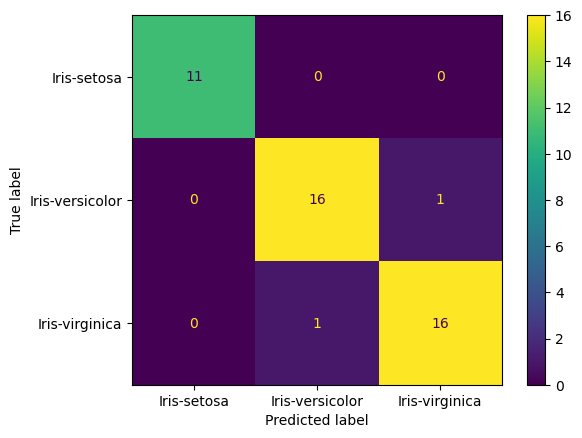

In [184]:
from sklearn.metrics import accuracy_score, plot_confusion_matrix
plot_confusion_matrix(lr, X_test, y_test)
accuracy = accuracy_score(y_test, y_pred)
print('Akurasi Testing NBC:', accuracy)

# Ir.fit(X_train, y_train)
# y_pred = Ir.predict(X_test)
score_lr = metrics.accuracy_score(y_test, y_pred)
print("Akurasi dengan menggunakan Logistic Regression: ", score_lr)

from sklearn.metrics import precision_recall_fscore_support
P=precision_recall_fscore_support(y_test, y_pred, average='macro')
print("Precison : ",P[0])
print("Recall : ",P[1])
print("F Score : ",P[2])

## 2.2 Support Vector Machine

Penjelasan lebih lengkap mengenai penggunaan Support Vector Machine dapat dilihat pada https://scikit-learn.org/stable/modules/generated/sklearn.svm.SVC.html

In [185]:
from sklearn.svm import SVC
from sklearn import metrics

svm = SVC(
  kernel = 'rbf',
  C = 1,
  gamma = 0.01
)

svm.fit(X_train, y_train)
y_pred = svm.predict(X_test)
score_svm = metrics.accuracy_score(y_test, y_pred)
print("Akurasi dengan menggunakan Support Vector Machine: ", score_svm)

Akurasi dengan menggunakan Support Vector Machine:  0.8222222222222222


Akurasi Testing SVM: 0.8222222222222222
Precison :  0.8456140350877193
Recall :  0.8431372549019608
F Score :  0.8425925925925926


C:\Users\TRI\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


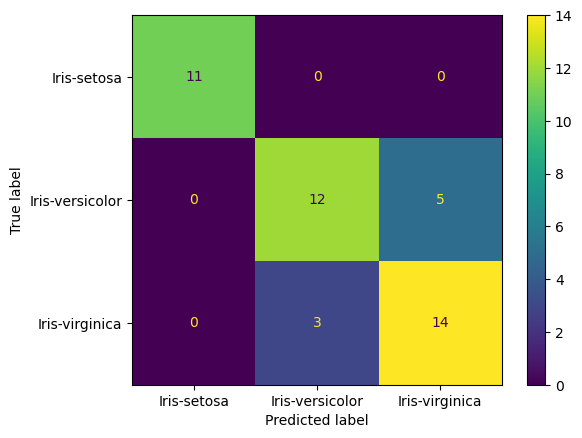

In [186]:
from sklearn.metrics import accuracy_score, plot_confusion_matrix
plot_confusion_matrix(svm, X_test, y_test)
accuracy = accuracy_score(y_test, y_pred)
print('Akurasi Testing SVM:', accuracy)

from sklearn.metrics import precision_recall_fscore_support
P=precision_recall_fscore_support(y_test, y_pred, average='macro')
print("Precison : ",P[0])
print("Recall : ",P[1])
print("F Score : ",P[2])

### Hyperparameter SVM

Saat menggunakan model SVM, beberapa parameter dapat diubah sesuai dengan kebutuhan, antara lain kernel (linear, polynomial, rbf), nilai C, dan nilai Gamma.

In [187]:
# SVM dengan kernel Linear, nilai parameter C dapat diubah juga.
svmLinear = SVC(
  kernel = 'linear',
      C = 1)

svmLinear.fit(X_train, y_train)
y_pred = svmLinear.predict(X_test)
score_hsvm = metrics.accuracy_score(y_test, y_pred)
print("Akurasi dengan menggunakan Support Vector Machine Linear Kernel: ", score_hsvm)

Akurasi dengan menggunakan Support Vector Machine Linear Kernel:  0.9777777777777777


Akurasi Testing SVM: 0.9777777777777777
Precison :  0.9814814814814815
Recall :  0.9803921568627452
F Score :  0.9803751803751805


C:\Users\TRI\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


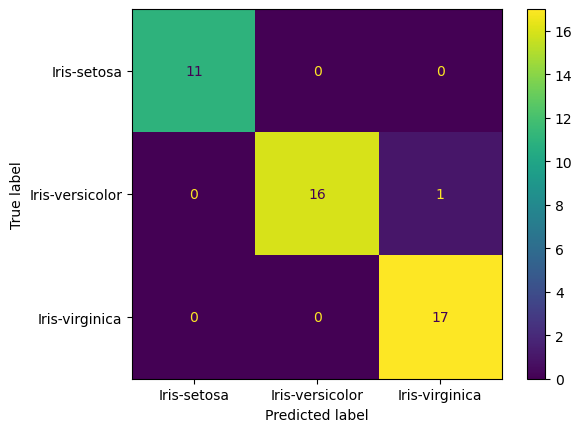

In [188]:
from sklearn.metrics import accuracy_score, plot_confusion_matrix
plot_confusion_matrix(svmLinear, X_test, y_test)
accuracy = accuracy_score(y_test, y_pred)
print('Akurasi Testing SVM:', accuracy)

from sklearn.metrics import precision_recall_fscore_support
P=precision_recall_fscore_support(y_test, y_pred, average='macro')
print("Precison : ",P[0])
print("Recall : ",P[1])
print("F Score : ",P[2])

In [189]:
# SVM dengan kernel polynomial, nilai parameter C, degree, dan gamma dapat diubah juga.
svmPoly = SVC(
  kernel = 'poly',
  C = 1,
  gamma = 0.01,
  degree = 2
)

svmPoly.fit(X_train, y_train)
y_pred = svmPoly.predict(X_test)
score_hsvmP = metrics.accuracy_score(y_test, y_pred)
print("Akurasi dengan menggunakan Support Vector Machine Polynomial Kernel: ", score_hsvmP)

Akurasi dengan menggunakan Support Vector Machine Polynomial Kernel:  0.24444444444444444


Akurasi Testing NBC: 0.24444444444444444


C:\Users\TRI\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


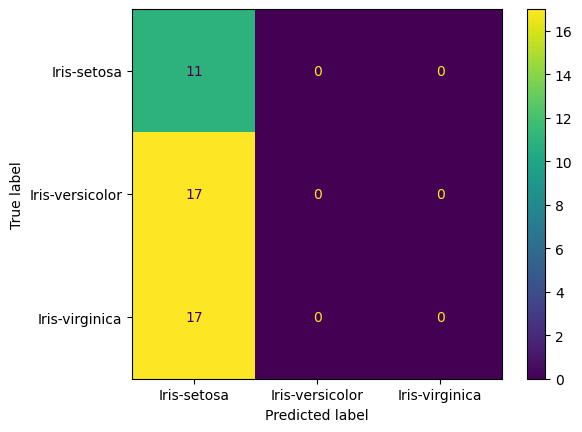

In [190]:
from sklearn.metrics import accuracy_score, plot_confusion_matrix
plot_confusion_matrix(svmPoly, X_test, y_test)
accuracy = accuracy_score(y_test, y_pred)
print('Akurasi Testing NBC:', accuracy)

In [191]:
# SVM dengan kernel RBF, nilai parameter C dan gamma dapat diubah juga.
svmRBF = SVC(
  kernel = 'rbf',
  C = 1,
  gamma = 0.01,
)

svmRBF.fit(X_train, y_train)
y_pred = svmRBF.predict(X_test)
score_svmRBF = metrics.accuracy_score(y_test, y_pred)
print("Akurasi dengan menggunakan Support Vector Machine RBF Kernel: ", score_svmRBF)

from sklearn.metrics import precision_recall_fscore_support
P=precision_recall_fscore_support(y_test, y_pred, average='macro')
print("Precison : ",P[0])
print("Recall : ",P[1])
print("F Score : ",P[2])

Akurasi dengan menggunakan Support Vector Machine RBF Kernel:  0.8222222222222222
Precison :  0.8456140350877193
Recall :  0.8431372549019608
F Score :  0.8425925925925926


Akurasi Testing NBC: 0.8222222222222222
Precison :  0.8456140350877193
Recall :  0.8431372549019608
F Score :  0.8425925925925926


C:\Users\TRI\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


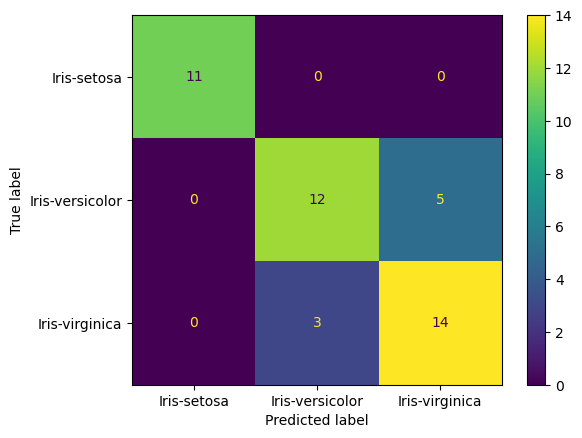

In [192]:
from sklearn.metrics import accuracy_score, plot_confusion_matrix
plot_confusion_matrix(svmRBF, X_test, y_test)
accuracy = accuracy_score(y_test, y_pred)
print('Akurasi Testing NBC:', accuracy)

from sklearn.metrics import precision_recall_fscore_support
P=precision_recall_fscore_support(y_test, y_pred, average='macro')
print("Precison : ",P[0])
print("Recall : ",P[1])
print("F Score : ",P[2])

## 2.3 Decision Tree

Penjelasan lebih lengkap mengenai penggunaan Decision Tree dapat dilihat pada https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html#sklearn.tree.DecisionTreeClassifier

In [193]:
from sklearn.tree import DecisionTreeClassifier
from sklearn import metrics

dt = DecisionTreeClassifier(
  max_depth = None,
  min_samples_split = 2
)

dt.fit(X_train, y_train)
y_pred = dt.predict(X_test)
score_dt = metrics.accuracy_score(y_test, y_pred)
print("Akurasi dengan menggunakan Decision Tree: ", score_dt)

Akurasi dengan menggunakan Decision Tree:  0.9777777777777777


Akurasi Testing Decision Tree: 0.9777777777777777
Precison :  0.9814814814814815
Recall :  0.9803921568627452
F Score :  0.9803751803751805


C:\Users\TRI\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


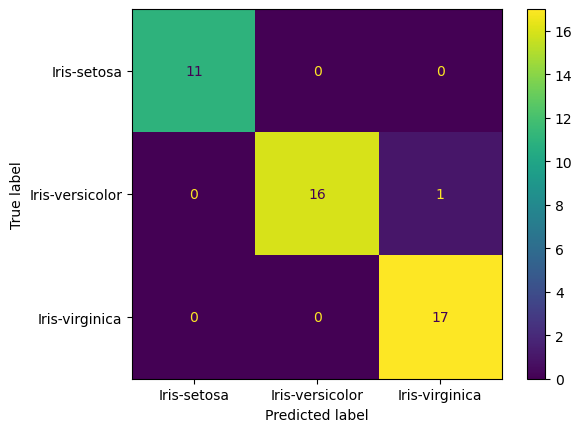

In [194]:
from sklearn.metrics import accuracy_score, plot_confusion_matrix
plot_confusion_matrix(dt, X_test, y_test)
accuracy = accuracy_score(y_test, y_pred)
print('Akurasi Testing Decision Tree:', accuracy)

from sklearn.metrics import precision_recall_fscore_support
P=precision_recall_fscore_support(y_test, y_pred, average='macro')
print("Precison : ",P[0])
print("Recall : ",P[1])
print("F Score : ",P[2])

### Hyperparameter Decision Tree

Saat menggunakan model Decision Tree, beberapa parameter dapat diubah sesuai dengan kebutuhan, antara max_depth dan min_samples_split.

In [195]:
# Decision Tree dengan maximal kedalaman adalah max_depth,
# dan minimal jumlah sampel untuk dibentuk leaf baru adalah min_samples_split

dt = DecisionTreeClassifier(
  max_depth = 130,
  min_samples_split = 5
)

dt.fit(X_train, y_train)
y_pred = dt.predict(X_test)
score_hdt = metrics.accuracy_score(y_test, y_pred)
print("Akurasi dengan menggunakan Decision Tree: ", score_hdt)

Akurasi dengan menggunakan Decision Tree:  0.9777777777777777


Akurasi Testing NBC: 0.9777777777777777
Precison :  0.9814814814814815
Recall :  0.9803921568627452
F Score :  0.9803751803751805


C:\Users\TRI\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


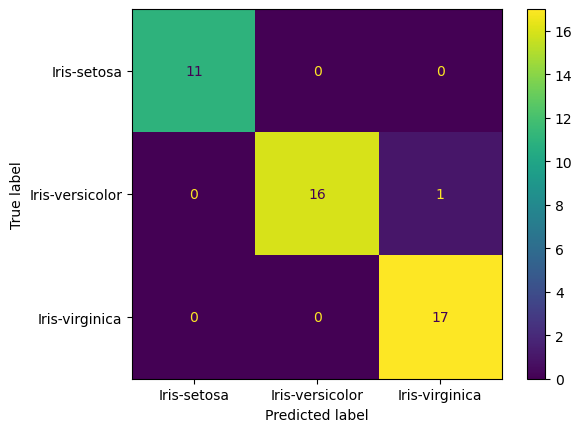

In [196]:
from sklearn.metrics import accuracy_score, plot_confusion_matrix
plot_confusion_matrix(dt, X_test, y_test)
accuracy = accuracy_score(y_test, y_pred)
print('Akurasi Testing NBC:', accuracy)

from sklearn.metrics import precision_recall_fscore_support
P=precision_recall_fscore_support(y_test, y_pred, average='macro')
print("Precison : ",P[0])
print("Recall : ",P[1])
print("F Score : ",P[2])

## 2.4 Naive Bayes

Penjelasan lebih lengkap mengenai penggunaan Naive Bayes dapat dilihat pada https://scikit-learn.org/stable/modules/generated/sklearn.naive_bayes.BernoulliNB.html#sklearn.naive_bayes.BernoulliNB

In [197]:
from sklearn import naive_bayes
from sklearn import metrics

nb = naive_bayes.BernoulliNB()

nb.fit(X_train, y_train)
y_pred = nb.predict(X_test)
score_nb = metrics.accuracy_score(y_test, y_pred)
print("Akurasi dengan menggunakan Naive Bayes: ", score_nb)

Akurasi dengan menggunakan Naive Bayes:  0.7333333333333333


Akurasi Testing NBC: 0.7333333333333333
Precison :  0.7925925925925926
Recall :  0.7647058823529411
F Score :  0.7509157509157509


C:\Users\TRI\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


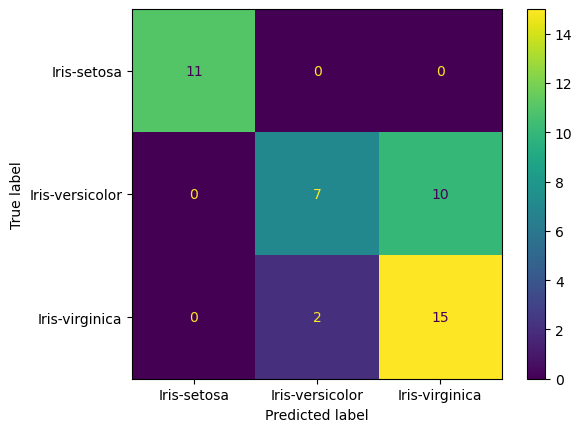

In [198]:
from sklearn.metrics import accuracy_score, plot_confusion_matrix
plot_confusion_matrix(nb, X_test, y_test)
accuracy = accuracy_score(y_test, y_pred)
print('Akurasi Testing NBC:', accuracy)

from sklearn.metrics import precision_recall_fscore_support
P=precision_recall_fscore_support(y_test, y_pred, average='macro')
print("Precison : ",P[0])
print("Recall : ",P[1])
print("F Score : ",P[2])

## 2.5 K-Nearest Neighbors

Penjelasan lebih lengkap mengenai penggunaan K-Nearest Neighbors dapat dilihat pada https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html#sklearn.neighbors.KNeighborsClassifier

In [199]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics

knn = KNeighborsClassifier()

knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)
score_knn = metrics.accuracy_score(y_test, y_pred)
print("Akurasi dengan menggunakan Nearest Neighbor: ", score_knn)

Akurasi dengan menggunakan Nearest Neighbor:  0.9777777777777777


C:\Users\TRI\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


C:\Users\TRI\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)
C:\Users\TRI\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


Akurasi Testing K-NN: 0.9777777777777777
Precison :  0.9814814814814815
Recall :  0.9803921568627452
F Score :  0.9803751803751805


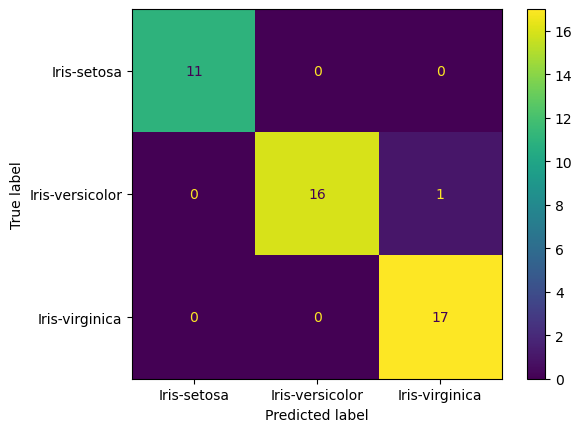

In [200]:
from sklearn.metrics import accuracy_score, plot_confusion_matrix


plot_confusion_matrix(knn, X_test, y_test)
accuracy = accuracy_score(y_test, y_pred)
print('Akurasi Testing K-NN:', accuracy)

from sklearn.metrics import precision_recall_fscore_support
P=precision_recall_fscore_support(y_test, y_pred, average='macro')
print("Precison : ",P[0])
print("Recall : ",P[1])
print("F Score : ",P[2])

## 2.6 AdaBoostClassifier

In [201]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn import metrics

In [202]:
ab=AdaBoostClassifier(
n_estimators=600,
learning_rate=1
)
ab.fit(X_train, y_train)
y_pred = ab.predict(X_test)
score_ab = metrics.accuracy_score(y_test, y_pred)
print("Akurasi dengan menggunakan AdaBoostClassifier: ", score_ab)

Akurasi dengan menggunakan AdaBoostClassifier:  0.9111111111111111


Akurasi Testing adaBoost: 0.9111111111111111
Precison :  0.9251461988304094
Recall :  0.9215686274509803
F Score :  0.9212962962962963


C:\Users\TRI\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


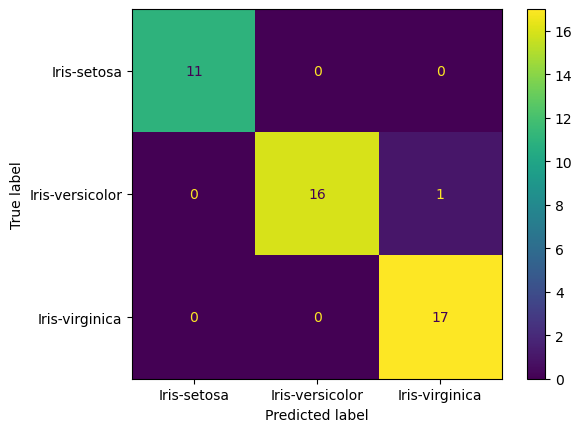

In [203]:
from sklearn.metrics import accuracy_score, plot_confusion_matrix
plot_confusion_matrix(dt, X_test, y_test)
accuracy = accuracy_score(y_test, y_pred)
print('Akurasi Testing adaBoost:', accuracy)

from sklearn.metrics import precision_recall_fscore_support
P=precision_recall_fscore_support(y_test, y_pred, average='macro')
print("Precison : ",P[0])
print("Recall : ",P[1])
print("F Score : ",P[2])

## Perbandingan Hasil Klasifikasi Data Pendaftar Untuk Berbagai Metoda Klasifikasi :


In [204]:
#Lengkapi koding untuk menampilkan di sini semua parameter evaluasi untuk semua model/algoritima klasifikasi di atas
print("Perbandingan Hasil Akurasi beberapa MODEL di atas  :")
print("==============================================")
print("Akurasi Logistic Regression :  ",score_lr)
print("Akurasi Support Vector Machine :",score_svm)
print("Akurasi Decision Tree :", score_dt)
print("Akurasi Naive Bayes : ",score_nb)
print("Akurasi Nearest Neighbor :",score_knn)
print("Akurasi AdaBoostClassifier :",score_ab)

Perbandingan Hasil Akurasi beberapa MODEL di atas  :
Akurasi Logistic Regression :   0.9555555555555556
Akurasi Support Vector Machine : 0.8222222222222222
Akurasi Decision Tree : 0.9777777777777777
Akurasi Naive Bayes :  0.7333333333333333
Akurasi Nearest Neighbor : 0.9777777777777777
Akurasi AdaBoostClassifier : 0.9111111111111111


---

## Pilih satu satu Algortima yang hasil trainingnya terbaik menurut anda dan Menyimpan model dengan pickle  Gunakan untuk anda Deploy dalam bentuk aplikasi streamlit dan upload ke streamlit

In [205]:
#contoh
import joblib

joblib.dump(dt,open('best_model.joblib','wb'))